In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime

In [21]:
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler

In [2]:
raw_train_data = pd.read_csv('train_MNIST.csv/train.csv')
raw_train_data.head()

test_data = pd.read_csv('test_MNIST.csv/test.csv')


In [3]:
y_train = raw_train_data.label
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [4]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = raw_train_data.loc[:,'pixel0':]
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train.shape

(42000, 784)

In [7]:
test_data.shape

(28000, 784)

In [8]:
X_traintest = pd.concat([X_train,test_data],ignore_index=True)
X_traintest.shape

(70000, 784)

In [9]:
max(X_traintest.describe().loc['max'])

255.0

In [10]:
raw_train_data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [11]:
X_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 418.7 MB


In [12]:
X_traintest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 418.7 MB


In [13]:
np.sqrt(784)

28.0

In [14]:
rfc = RandomForestClassifier(n_estimators = 10, max_features=None,random_state = 0, bootstrap=True)

In [ ]:
#random forest without PCA

In [16]:
start=datetime.now()
#rfc.fit(X=X_train_scld,y=y_train)
rfc.fit(X=X_train,y=y_train)
end=datetime.now()
print(end-start)

0:01:31.748515


In [17]:
y_test = rfc.predict(test_data)
y_test.shape

(28000,)

In [18]:
print(range(1,28000))

range(1, 28000)


In [ ]:
#prepare for Kaggle submission

In [19]:
test_output = pd.DataFrame(y_test,index=range(1,28001))
test_output.index.name = 'ImageId'
test_output.columns = ['Label']

test_output.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [62]:
test_output.to_csv('MNIST_submission.csv',index=True)

In [22]:
X_traintest_std = StandardScaler().fit_transform(X_traintest)

In [23]:
# Create a principle component object and fit it to the combined train and test sets
start=datetime.now()
pca = PCA().fit(X_traintest_std)
end=datetime.now()
print(end-start)

0:00:15.148209


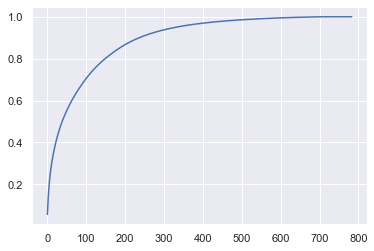

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [27]:
np.cumsum(pca.explained_variance_ratio_)[:5]

array([0.05642719, 0.09683945, 0.13422218, 0.16315218, 0.1883597 ])

In [28]:
# Identify the minimum number of components to explain 95% of the variance 

In [29]:
m = min(i for i in np.cumsum(pca.explained_variance_ratio_) if i >= .95)

In [30]:
# generator object

In [31]:
list_cumulative_var = np.cumsum(pca.explained_variance_ratio_).tolist()

In [32]:
n_components = list_cumulative_var.index(m) + 1

In [33]:
n_components

332

In [34]:
# Create PCA object with the minimum number of components to explain 95% of variance
pca2 = PCA(n_components= n_components)

In [35]:
start=datetime.now()
pca2.fit(X_traintest_std)
X_pca2 = pca2.transform(X_traintest_std)
end=datetime.now()
print(end-start)

0:00:22.382257


In [36]:
pca2.components_.shape
# 332 components mapped out to 784 variables

(332, 784)

In [37]:
X_pca2.shape

(70000, 332)

In [39]:
np.cumsum(pca2.explained_variance_ratio_)[:5]

array([0.05642719, 0.09683945, 0.13422218, 0.16315218, 0.1883597 ])

In [40]:
#Scale the train and test data based on the combined train and test data

In [41]:
sclr = StandardScaler()
sclr.fit(X_traintest)
X_train_scld = sclr.transform(X_train)
X_test_scld = sclr.transform(test_data)

In [42]:
#Transform train date to PCA

In [43]:
start=datetime.now()
X_train_pca2 = pca2.transform(X_train_scld)
end=datetime.now()
print(end-start)
#super fast to transform data into principal components

0:00:00.671998


In [44]:
X_train_pca2.shape

(42000, 332)

In [47]:
X_train_pca2[:5]

array([[-5.23019174, -4.90464555,  4.17549757, ..., -0.04190429,
         0.16975606,  0.0483987 ],
       [19.37606393,  5.92493676,  1.12452658, ..., -0.24338441,
         0.08179463, -0.11049297],
       [-7.67586781, -1.51833505,  2.36963618, ..., -0.08143707,
        -0.06003555, -0.14699554],
       [-0.36091659,  5.98887493,  1.6762118 , ..., -0.24243082,
        -0.30136631, -1.29322434],
       [26.6285467 ,  5.8056483 ,  0.8337788 , ...,  1.04297736,
         0.09438603, -0.26911932]])

In [46]:
rfc2 = RandomForestClassifier(n_estimators = 10, max_features='sqrt',random_state = 0, bootstrap=True)
start=datetime.now()
rfc2.fit(X=X_train_pca2,y=y_train)
end=datetime.now()
print(end-start)

0:00:09.960756


In [48]:
X_test_pca2 = pca2.transform(X_test_scld)

In [49]:
# Build random forest with principle components
start=datetime.now()
y_test_pca2 = rfc2.predict(X_test_pca2)
y_test_pca2.shape
end=datetime.now()
print(end-start)

0:00:00.247975


In [50]:
print(range(1,28000))

range(1, 28000)


In [51]:
# Prepare for Kaggle submission
test_output2 = pd.DataFrame(y_test_pca2,index=range(1,28001))
test_output2.index.name = 'ImageId'
test_output2.columns = ['Label']

test_output2.head()

,Label
ImageId,
1,2
2,0
3,8
4,2
5,3


In [52]:
test_output2.to_csv('MNIST_submission_pca_rf.csv',index=True)

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
modelname = []
rmsescore = []
stdrmsescore = []

for model in [rfc]:
    scores = cross_val_score(model, X_train, y_train, scoring = "f1_macro", cv = 5)
    rmse_scores = np.sqrt(-scores)
    modelname.append(model.__class__.__name__)
    rmsescore.append(round(rmse_scores.mean(),3))
    stdrmsescore.append(round(rmse_scores.std(),3))

C:\Users\jackm\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [55]:
scores.mean()

0.9280012349378769

In [56]:
scores.std()

0.0064651693005254

In [57]:
modelname = []
rmsescore = []
stdrmsescore = []

for model in [rfc2]:
    scores = cross_val_score(model, X_train_pca2, y_train, scoring = "f1_micro", cv = 5)
    rmse_scores = np.sqrt(-scores)
    modelname.append(model.__class__.__name__)
    rmsescore.append(round(rmse_scores.mean(),3))
    stdrmsescore.append(round(rmse_scores.std(),3))

C:\Users\jackm\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [58]:
scores.mean()

0.8635474570440895

In [59]:
scores.std()

0.002871544641021775

In [61]:
# Random forest model built on all features was more accurate but took 1 minute 31 seconds to build
# Model built on 332 principal components was less accureate but only took 10 seconds to build!